<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
##  II Escuela de Verano en Física Computacional

Autor: [Josimar Chire](https://github.com/jecs89).\
Institución: Research4Tech\
Correo: jecs89@gmail.com
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.
    

# <center> Sesión 1. Inteligencia Artificial aplicada a Física

<img align="center" src="https://img.freepik.com/vector-gratis/tecnologia-digital-enfrenta-inteligencia-artificial_1017-21770.jpg"  width=65% />

## Outline
1. [Computación Evolutiva para Optimización Monobjetivo sin restricciones](#1.-Funciones)
2. [Procesamiento de Imágenes](#2.-Imagenes)
3. [Machine Learning aplicado a Detección de estrellas](#3.-Estrellas)

## 1. Funciones
Computación evolutiva es una área de Inteligencia Artificial, son algoritmos inspirados en la evolución biológica para resolver problemas de optimización.

<img align="center" src="https://lh6.googleusercontent.com/na4CKBbtZukfpjhS-ThB-YgAMqoPRMQASTDSo6norGJnWmHRMFMgPGuoc84xeFoPmhXWhd7KnsGyfFD8Bs7A5VYP5IiqGHakE7wJ3cr0efQhhNBVvue8YFM3OZMZVEAlOiIOt_TP"  width=25% /> Source image: https://blog.floydhub.com/introduction-to-genetic-algorithms/

In [1]:
##Función objetivo
import numpy as np
import matplotlib.pyplot as plt
import random

def fun_obj(X):
  fun_list = []
  for i in range(X.shape[0]):
    sum = 0
    for j in range(X.shape[1]):
      sum += X[i,j]*X[i,j]
    fun_list.append(sum)
  return fun_list

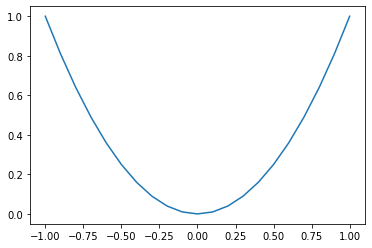

In [2]:
##Gráfico x^2
x = np.arange(-1,1.00001,0.1)
y = x**2
plt.plot(x,y)
# plt.scatter(population, fun_obj(population))
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.23669381 0.89267922 0.78601936 0.97932281 0.57417404 0.65862391
  0.99785247 0.3319665  0.21434249 0.42874016]]


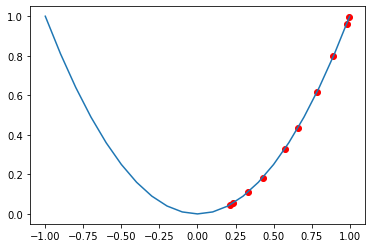

In [6]:
##Generación de población inicial
pop_size = 10
D = 1
population = np.zeros([pop_size, D])
print(population.T)

for i in range(population.shape[0]):
  for j in range(population.shape[1]):
    population[i,j] = random.random()
print(population.T)

x = np.arange(-1,1.00001,0.1)
y = x**2
plt.plot(x,y)
plt.scatter(population, fun_obj(population), c='r')
population_0 = np.copy(population)
plt.show()

In [7]:
##Algoritmo roulette wheel 
fitness = np.array(fun_obj(population))
fitness_norm = fitness/fitness.sum()
print(fitness_norm)

fitness_acum = np.zeros(fitness.shape)
fitness_acum[0] = fitness_norm[0]
for i in range(1, fitness_norm.shape[0]):
  fitness_acum[i] = fitness_acum[i-1] + fitness_norm[i]
print(fitness_acum)

def selection_idx(fitness_acum):
  coin1 = random.random()
  idx1 = -1
  if coin1 < fitness_acum[0]:
    idx1 = 0
  # if coin2 < fitness_acum[0]:
  #   idx2 = 0
  for i in range(len(fitness_acum)-1):
    if fitness_acum[i] <= coin1 < fitness_acum[i+1]:
      idx1 = i
  # print(idx1)
  return idx1
# coin1 = selection_idx(fitness_acum)
# coin2 = selection_idx(fitness_acum)
# print(coin1, coin2)
##

##Generar población
def generate_population(population, fitness_acum, prob_cross, prob_mut):
  new_population = []
  for i in range(population.shape[0]):
    ##crossover
    coin_cross = random.random()
    if coin_cross <= prob_cross:
      
      idx1 = selection_idx(fitness_acum)
      idx2 = selection_idx(fitness_acum)
      # print(idx1, idx2)
      individual = []
      for j in range(population.shape[1]):
        individual.append( (population[idx1][j] + population[idx2][j]) / 2 )

    ##mutation
    idx3 = random.randrange(0, pop_size)
    # print('coin1: ', idx3)
    inc = 0.01
    individual = population[idx3]
    for j in range(len( individual )):
      coin = random.random()
      if coin < 0.5:
        individual[j] += inc
      else:
        individual[j] -= inc
    new_population.append(np.array(individual))
  return new_population

##Prueba
prob_cross = 0.5
prob_mut = 0.01
new_population = np.array(generate_population(population, fitness_acum, prob_cross, prob_mut))
print(new_population.T)

[0.01237023 0.1759523  0.13641765 0.2117658  0.07279326 0.09578094
 0.21985521 0.02433283 0.01014427 0.04058751]
[0.01237023 0.18832253 0.32474018 0.53650599 0.60929925 0.70508019
 0.92493539 0.94926822 0.95941249 1.        ]
[[0.3419665  0.58417404 0.24669381 0.25669381 0.20434249 0.24669381
  0.88267922 0.19434249 0.18434249 0.57417404]]


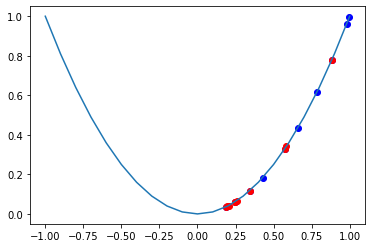

In [8]:
##Comparación resultados de prueba
x = np.arange(-1,1.00001,0.1)
y = x**2
plt.plot(x,y)
plt.scatter(population, fun_obj(population), c='b')
plt.scatter(new_population, fun_obj(new_population), c='r')
plt.show()

In [9]:
##Ejecución algoritmo
generations = 100
for i in range(generations):
  new_population = np.array(generate_population(population, fitness_acum, prob_cross, prob_mut))
  population = np.copy(new_population)
print(population.T)

[[0.14669381 0.31669381 0.15669381 0.15669381 0.20669381 0.30669381
  0.16669381 0.32669381 0.33669381 0.19669381]]


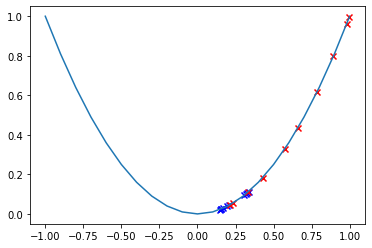

In [10]:
##Resultados de población inicial y final.
x = np.arange(-1,1.00001,0.1)
y = x**2
plt.plot(x,y)
plt.scatter(population, fun_obj(population), c='b', marker= 'x')
# plt.scatter(new_population, fun_obj(new_population), c='r', marker= '*')
plt.scatter(population_0, fun_obj(population_0), c='r', marker= 'x')
plt.show()

## 2. Imagenes

<img src='https://news.harvard.edu/wp-content/uploads/2020/03/F1.large-2-1200x800.jpg'/>

In [21]:
!wget https://news.harvard.edu/wp-content/uploads/2020/03/F1.large-2-1200x800.jpg

--2021-04-01 03:44:17--  https://news.harvard.edu/wp-content/uploads/2020/03/F1.large-2-1200x800.jpg
Resolving news.harvard.edu (news.harvard.edu)... 23.185.0.4, 2620:12a:8000::4, 2620:12a:8001::4
Connecting to news.harvard.edu (news.harvard.edu)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34937 (34K) [image/jpeg]
Saving to: ‘F1.large-2-1200x800.jpg.1’

F1.large-2-1200x800 100%[===================>]  34.12K  --.-KB/s    in 0.004s  

2021-04-01 03:44:17 (7.93 MB/s) - ‘F1.large-2-1200x800.jpg.1’ saved [34937/34937]



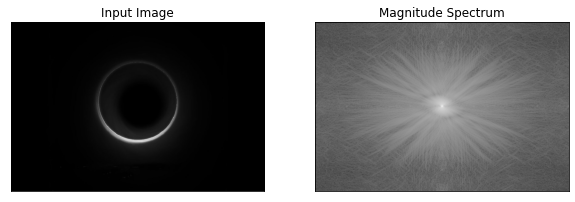

In [11]:
###https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('F1.large-2-1200x800.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

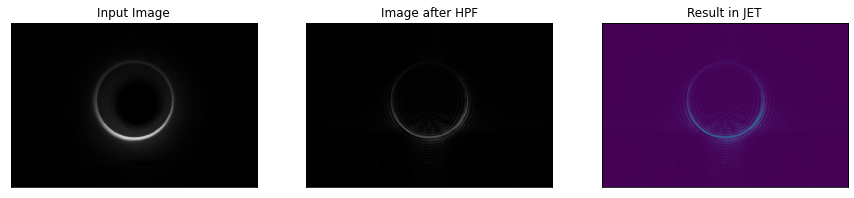

In [12]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(15,7))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

## 3. Estrellas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [14]:
classifiers = [
    
    ("Gausssian-NB", GaussianNB()),
    ("Logistic-Regression", LogisticRegression()),
    ("Decision-Tree", DecisionTreeClassifier(criterion='gini', max_depth=7)),
    #why not use parameter
    ("MLPClassifier", MLPClassifier(alpha=1, max_iter=200)), 
    #MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=200)
    ("RF", RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)),
   
]

new_columns = ['mean_integrated_profile', 'std_integrated_profile',
               'excess_kurtosis_integrated_profile', 'skewness_integrated_profile',
               'mean_dm-snr_curve', 'std_dm-snr_curve',
               'excess_kurtosis_dm-snr_curve', 'skewness_dm-snr_curve',
               'target_class']

In [15]:
dataset_src = pd.read_csv('pulsar_stars.csv')
dataset_src.columns = new_columns
dataset_src = dataset_src[['skewness_integrated_profile', 'excess_kurtosis_integrated_profile', 'std_dm-snr_curve', 'mean_dm-snr_curve','skewness_dm-snr_curve', 'excess_kurtosis_dm-snr_curve', 'target_class']]
# dataset_src.head()

In [16]:
dataset_src['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [17]:
v_dataset = []
v_dataset.append(dataset_src)

In [18]:
v_report = []
for v in range(len(v_dataset)):
    # Scaling ONLY predictor values between 0 - 1
    dataset_src = v_dataset[v]
    print(dataset_src.shape)
    
    features = dataset_src.columns.tolist()
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset_src[features[:-1]] = scaler.fit_transform(dataset_src.drop(['target_class'], axis=1))

    train, test = train_test_split(dataset_src, test_size=.2, random_state=123)

    X_train = train.drop(['target_class'], axis=1)
    y_train = train['target_class']

    X_test = test.drop(['target_class'], axis=1)
    y_test = test['target_class']

    for name, clf in classifiers:
        print(name, end = ' ')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

#         print(type(classification_report(y_test, y_pred)))
        v_report.append([ name , classification_report(y_test, y_pred)])

        X = train.drop(['target_class'], axis=1)
        y = train['target_class']
        scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
        print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

(17898, 7)
Gausssian-NB Accuracy: 0.94 (+/- 0.02)
Logistic-Regression Accuracy: 0.97 (+/- 0.01)
Decision-Tree Accuracy: 0.98 (+/- 0.01)
MLPClassifier Accuracy: 0.96 (+/- 0.01)
RF Accuracy: 0.98 (+/- 0.01)


In [19]:
for i in v_report:
    print(i[0])
    print(i[1])

Gausssian-NB
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3232
           1       0.60      0.81      0.69       348

    accuracy                           0.93      3580
   macro avg       0.79      0.88      0.83      3580
weighted avg       0.94      0.93      0.93      3580

Logistic-Regression
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3232
           1       0.95      0.70      0.81       348

    accuracy                           0.97      3580
   macro avg       0.96      0.85      0.89      3580
weighted avg       0.97      0.97      0.97      3580

Decision-Tree
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3232
           1       0.88      0.84      0.86       348

    accuracy                           0.97      3580
   macro avg       0.93      0.91      0.92      3580
weighted avg       0.97    

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

# n_samples = 1000

pca_dataset = []

for v in v_dataset:
    dataset_src = v
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(dataset_src.values[:,0:7])
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2',  'principal component 3'])
    pca_dataset.append(principalDf)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for n in range(dataset_src.shape[0]):
        if(dataset_src.values[n,6] == 0):
            ax.scatter(principalDf.loc[n,'principal component 1'],principalDf.loc[n,'principal component 2'],principalDf.loc[n,'principal component 3'], c='r')
        elif(dataset_src.values[n,6] == 1):
            ax.scatter(principalDf.loc[n,'principal component 1'],principalDf.loc[n,'principal component 2'],principalDf.loc[n,'principal component 3'], c='b')
    ax.grid()    


## 5. Recursos útiles

* [How do you teach physics to machine learning models?](https://towardsdatascience.com/how-do-you-combine-machine-learning-and-physics-based-modeling-3a3545d58ab9)
* [AI for physics & physics for AI](https://www.youtube.com/watch?v=pkJkHB_c3nA)
* [AI workshop – from hype to real world applications](https://www.youtube.com/watch?v=Y-B-Ra0B1ik)

## Donaciones/Donations
<br>
<center>
Si la información de esta notebook te ayudó. <br>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/research4tech">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>